Setting up the environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = tf.keras.datasets.cifar10.load_data()
(X_train_full , y_train_full) , (X_test, y_test) = data

170498071/170498071 [==============================] - 36s 0us/step


In [3]:
X_train_full.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [15]:
X_train , y_train = X_train_full[:-10000] , y_train_full[:-10000]
X_valid , y_valid = X_train_full[-10000:] , y_train_full[-10000:]

In [16]:
X_train.shape

(40000, 32, 32, 3)

In [17]:
X_valid.shape

(10000, 32, 32, 3)

Data exploration

[1]


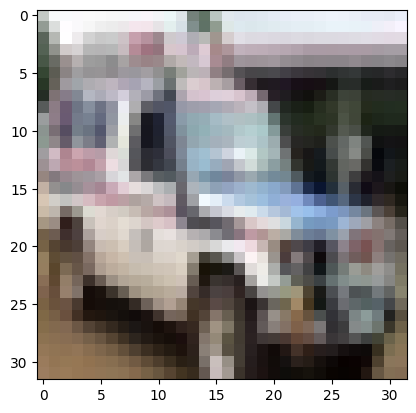

In [18]:
i = 27272
plt.imshow(X_train[i])
print(y_train[i])

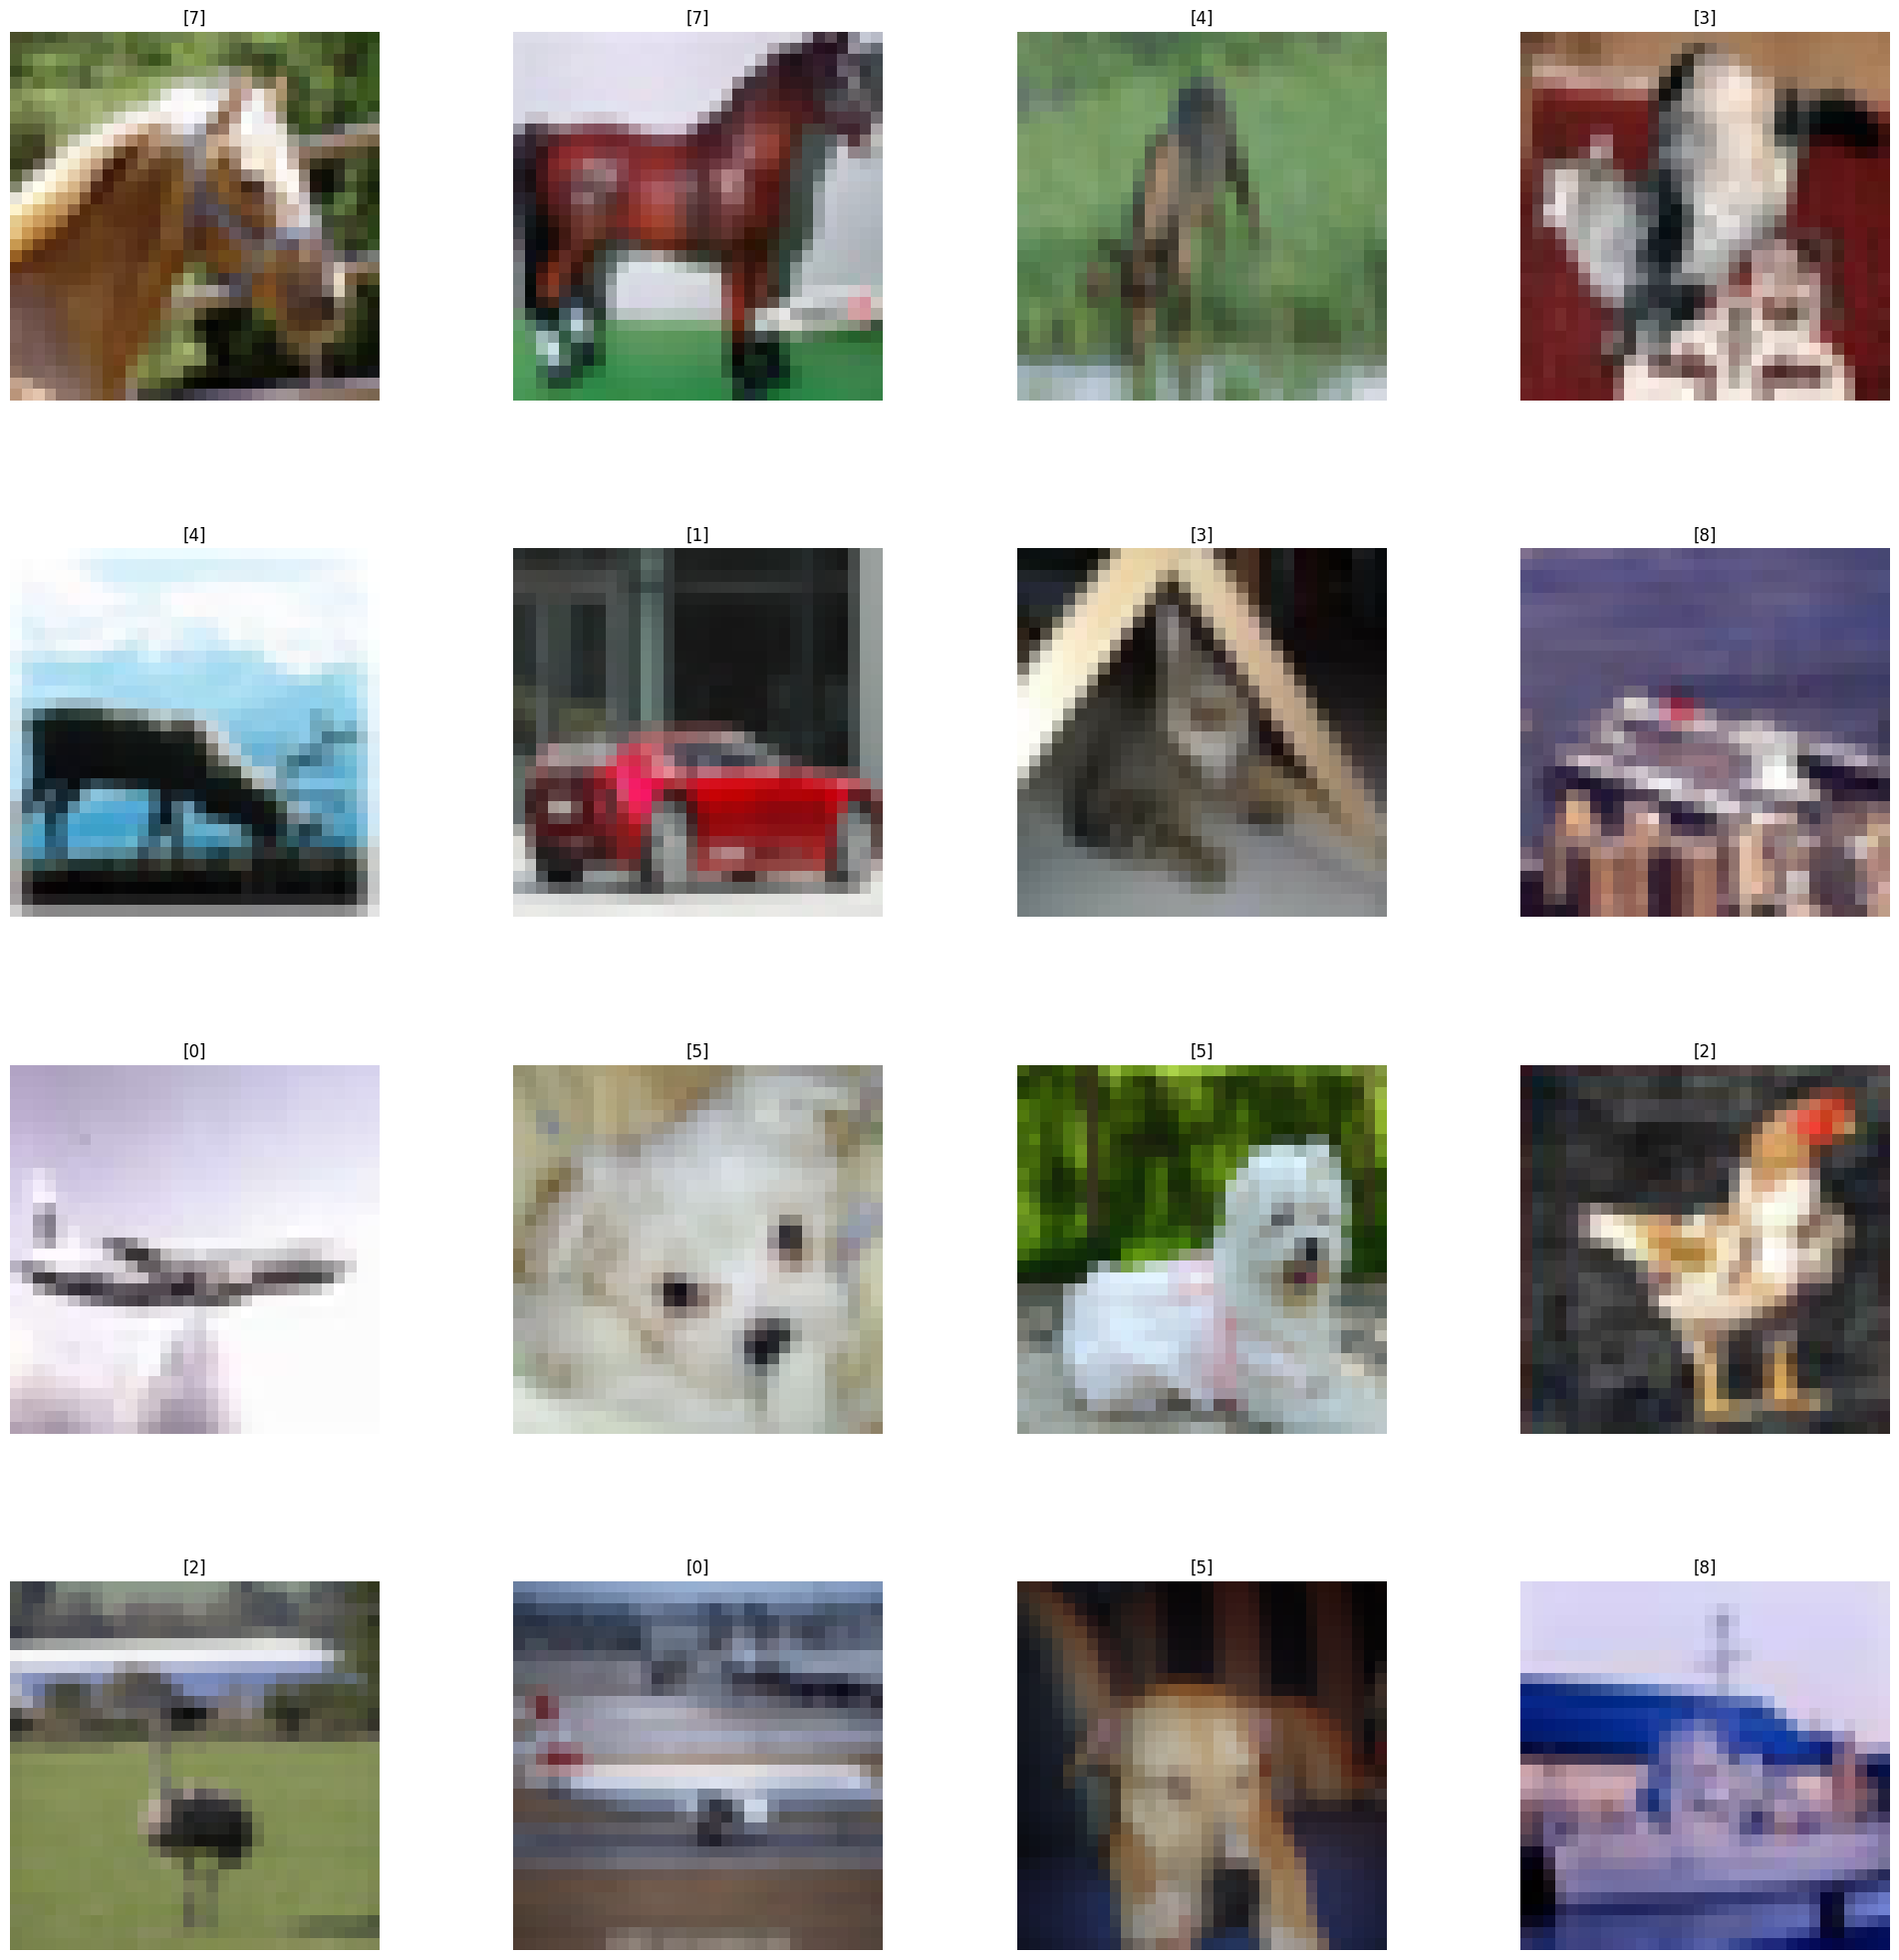

In [19]:
import random
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [20]:
X_train = X_train/255
X_test = X_test/255

Designing the CNN architecture

In [21]:
from functools import partial

tf.random.set_seed(42)
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")
model = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          multiple                  9472      
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 16, 16, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (32, 16, 16, 128)         73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 8, 8, 128)          0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (32, 8, 8, 256)           295168    
                                                                 
 max_pooling2d_8 (MaxPooling  (32, 4, 4, 256)         

Training the model

In [22]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)


Epoch 1/10
1250/1250 [==============================] - 95s 75ms/step - loss: 1.8956 - accuracy: 0.2786 - val_loss: 142.8304 - val_accuracy: 0.3674
Epoch 2/10
1250/1250 [==============================] - 79s 63ms/step - loss: 1.5262 - accuracy: 0.4376 - val_loss: 102.7756 - val_accuracy: 0.4321
Epoch 3/10
1250/1250 [==============================] - 60s 48ms/step - loss: 1.3638 - accuracy: 0.5064 - val_loss: 119.0880 - val_accuracy: 0.4350
Epoch 4/10
1250/1250 [==============================] - 51s 41ms/step - loss: 1.2474 - accuracy: 0.5556 - val_loss: 91.0288 - val_accuracy: 0.5186
Epoch 5/10
1250/1250 [==============================] - 52s 42ms/step - loss: 1.1535 - accuracy: 0.5949 - val_loss: 149.9036 - val_accuracy: 0.4781
Epoch 6/10
1250/1250 [==============================] - 52s 41ms/step - loss: 1.0728 - accuracy: 0.6255 - val_loss: 140.5236 - val_accuracy: 0.4776
Epoch 7/10
1250/1250 [==============================] - 52s 41ms/step - loss: 1.0129 - accuracy: 0.6537 - val_los

Error analysis

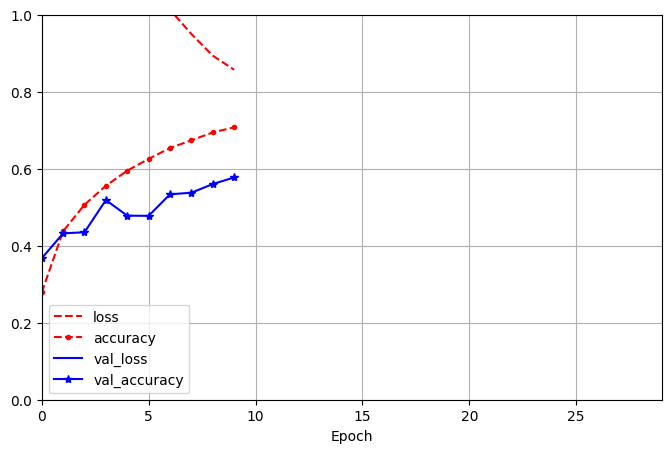

In [23]:
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()


In [24]:
model.evaluate(X_test , y_test)

313/313 [==============================] - 4s 13ms/step - loss: 3.3754 - accuracy: 0.1000


[3.375417470932007, 0.10000000149011612]